# Mass Transit: Project Part 1

It's your first day on the job. Your first task is to analyze the Mass Transit Data and present general insights. Let's get started.

### Imports

Since you are working in Python in a Jupyter Notebook, you want to use the following standard imports.

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Access Data

Next, you need to access the data as follows.

In [180]:
df = pd.read_csv('uber_every_1K_rows.csv', parse_dates=['Trip Start Timestamp', 'Trip End Timestamp'])

1. df is standard terminology. It stands for dataFrame. Throughout this project, whenever you see df, it's a reference to the data.

2. Notice that parse_dates=['Trip Start Timestamp', 'Trip End Timestamp']. This is very important. It allows us to treat these columns as dates. This will be useful later on.


### View Data

It's always a good idea to view the data. .head() is a method that shows you the first five rows.

In [181]:
df.head()

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,10c7f5b6e72604b2d61676539c794cae46a7892a,2019-01-11 20:00:00,2019-01-11 20:15:00,878.0,4.5,NaN,NaN,43.0,51.0,10.0,...,2.55,12.55,False,1,41.761578,-87.572782,POINT (-87.5727819867 41.7615779081),41.690633,-87.570058,POINT (-87.5700582686 41.6906333472)
1,10c9d0549abb476c40d28b6e8655236fc5c8337c,2019-01-04 03:15:00,2019-01-04 03:30:00,788.0,4.9,NaN,NaN,7.0,8.0,10.0,...,2.55,12.55,False,1,41.922686,-87.649489,POINT (-87.6494887289 41.9226862843),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
2,10cbc009f37188202e8cfaddcc8c9ebbccc78b06,2018-12-04 02:30:00,2018-12-04 02:45:00,862.0,6.5,NaN,NaN,39.0,32.0,10.0,...,2.50,13.50,False,1,41.808916,-87.596183,POINT (-87.5961833442 41.8089162826),41.878866,-87.625192,POINT (-87.6251921424 41.8788655841)
3,10cda8e401a74790b1deb7a9de194bf526b28fcc,2019-01-14 04:15:00,2019-01-14 04:15:00,708.0,2.6,1.703184e+10,1.703184e+10,34.0,31.0,7.5,...,0.00,7.50,True,1,41.851018,-87.635092,POINT (-87.6350918563 41.8510178239),41.847432,-87.663529,POINT (-87.6635286858 41.8474315472)
4,10cfaf1cb74d19ac8e71937512b7b526df49cb2c,2018-11-05 00:30:00,2018-11-05 00:45:00,539.0,1.9,1.703107e+10,1.703108e+10,7.0,8.0,5.0,...,2.50,7.50,False,1,41.914586,-87.645966,POINT (-87.6459662069 41.9145857091),41.899156,-87.626211,POINT (-87.6262105324 41.8991556134)


Take a moment to examine the data. Lots of interesting stuff. Notice the NaN values? These need to be dealt with. First, let's analyze the data using .describe()

In [182]:
df.describe()

,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tip,Additional Charges,Trip Total,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude
count,45335.000000,45338.000000,3.277200e+04,3.261500e+04,42630.000000,42319.000000,45338.000000,45338.000000,45338.000000,45338.000000,45338.000000,42663.000000,42663.000000,42339.000000,42339.000000
mean,1050.394993,5.843617,1.703136e+10,1.703138e+10,25.295825,25.873083,10.778541,0.522740,2.802098,14.103380,1.329481,41.892467,-87.665717,41.893435,-87.667936
std,736.613534,6.347701,3.326601e+05,3.383880e+05,20.164720,20.552015,8.898413,1.501123,1.862349,10.541434,0.806980,0.061407,0.059872,0.061396,0.063759
min,3.000000,0.000000,1.703101e+10,1.703101e+10,1.000000,1.000000,0.000000,0.000000,0.000000,0.670000,1.000000,41.650222,-87.913625,41.650222,-87.913625
25%,527.000000,1.800000,1.703108e+10,1.703108e+10,8.000000,8.000000,5.000000,0.000000,2.500000,7.550000,1.000000,41.877406,-87.679955,41.878667,-87.683227
50%,854.000000,3.600000,1.703124e+10,1.703124e+10,24.000000,24.000000,7.500000,0.000000,2.550000,10.050000,1.000000,41.893216,-87.652274,41.893216,-87.651970
75%,1378.000000,7.300000,1.703183e+10,1.703183e+10,32.000000,32.000000,12.500000,0.000000,2.550000,15.500000,1.000000,41.929078,-87.631864,41.930579,-87.631864
max,9154.000000,151.700000,1.703198e+10,1.703198e+10,77.000000,77.000000,170.000000,31.000000,20.950000,206.890000,14.000000,42.021224,-87.534903,42.021224,-87.530712


.describe() shows the count, the quartiles, and the median mean. It's always a good idea to compare the median and the mean. Note that the mean is usually greater than the median in this dataset. This indicates that most of the data is very right skewed. This can happen when most of the data is clustered around 0, and the mean is pulled away from the median by very high outliers. 

For instance, the median trip is 3.6 miles, but the max trip is almost 246 miles. 

(Recall that the median is equal to the "50%" row.)

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45338 entries, 0 to 45337
Data columns (total 21 columns):
Trip ID                       45338 non-null object
Trip Start Timestamp          45338 non-null datetime64[ns]
Trip End Timestamp            45338 non-null datetime64[ns]
Trip Seconds                  45335 non-null float64
Trip Miles                    45338 non-null float64
Pickup Census Tract           32772 non-null float64
Dropoff Census Tract          32615 non-null float64
Pickup Community Area         42630 non-null float64
Dropoff Community Area        42319 non-null float64
Fare                          45338 non-null float64
Tip                           45338 non-null int64
Additional Charges            45338 non-null float64
Trip Total                    45338 non-null float64
Shared Trip Authorized        45338 non-null bool
Trips Pooled                  45338 non-null int64
Pickup Centroid Latitude      42663 non-null float64
Pickup Centroid Longitude     42663 n

Whereas .describe() shows statistics for the numerical columns, .info() shows all the columns and it reveals the null values. Whenever the non-null count is below 50000, there are are null values in those columns.

There are many options for treating null values. The easiest is to get rid of them completely. This may not be possible if there are too many null values. Since our dataset is fairly large to begin with, we will take the easiest approach.

In [184]:
df = df.dropna(how='any',axis=0) 

## Visual Graphs

#### Histograms

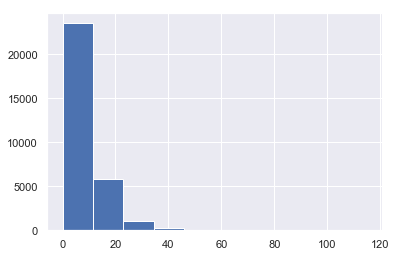

In [185]:
plt.hist(df['Fare'])
plt.show()

In [186]:
import seaborn as sns;

# Set up seaborn dark grid
sns.set()

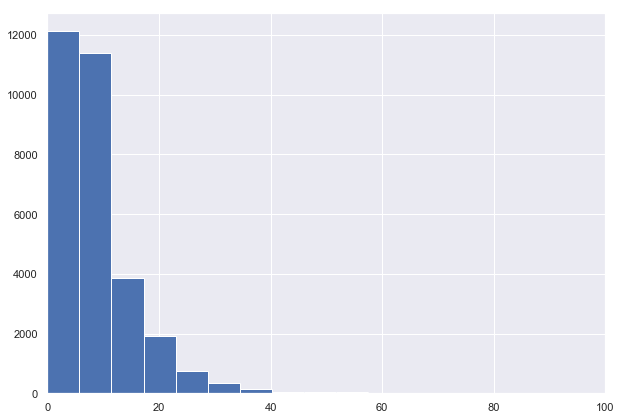

In [187]:
plt.figure(figsize=(10,7))
plt.xlim(0,100)
plt.hist(df['Fare'], bins=20)
plt.show()

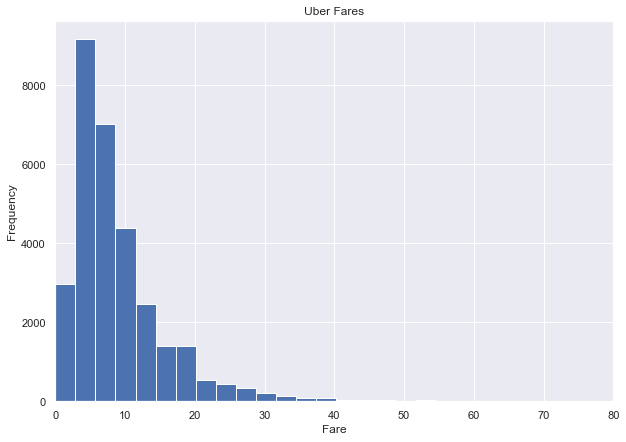

In [188]:
plt.figure(figsize=(10,7))
plt.xlim(0,80)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Uber Fares')
plt.hist(df['Fare'], bins=40)
plt.show()

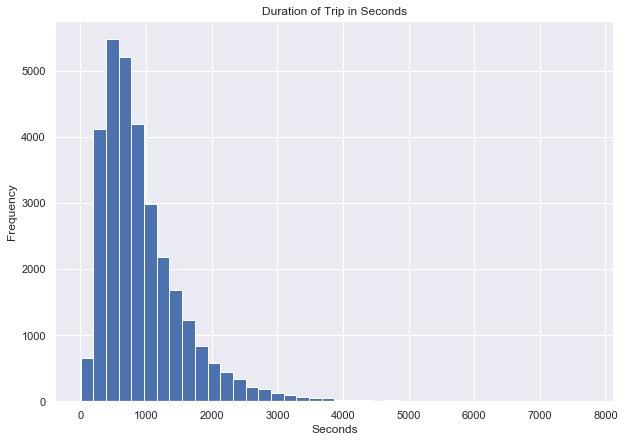

In [189]:
plt.figure(figsize=(10,7))
plt.xlabel('Seconds')
plt.ylabel('Frequency')
plt.title('Duration of Trip in Seconds')
plt.hist(df['Trip Seconds'], bins=40)
plt.show()

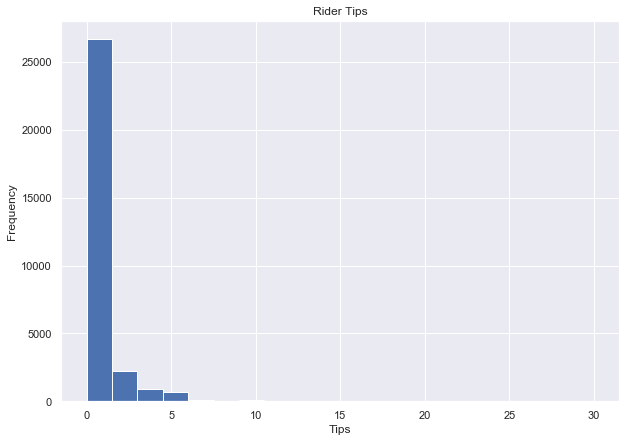

In [190]:
plt.figure(figsize=(10,7))
plt.xlabel('Tips')
plt.ylabel('Frequency')
plt.title('Rider Tips')
plt.hist(df['Tip'], bins=20)
plt.show()

#### Box Plots

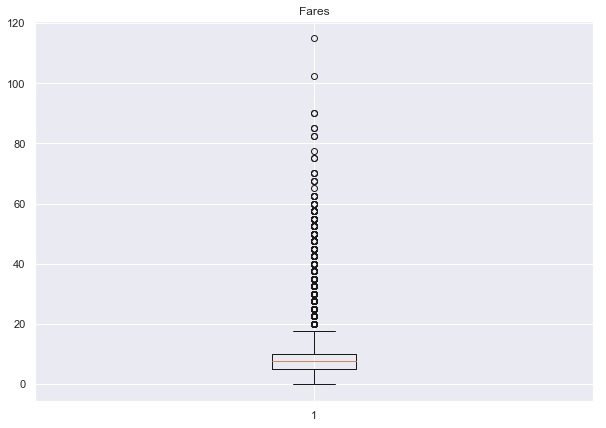

In [191]:
plt.figure(figsize=(10,7))
plt.boxplot(df['Fare'])
plt.title('Fares')
plt.show()

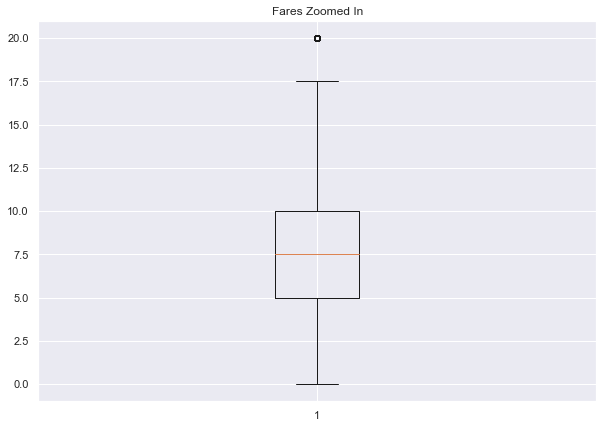

In [192]:
plt.figure(figsize=(10,7))
plt.boxplot(df['Fare'])
plt.title('Fares Zoomed In')
plt.ylim(-1,21)
plt.show()

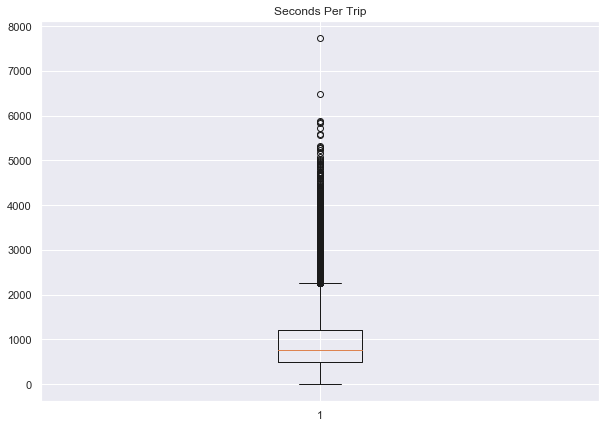

In [193]:
plt.figure(figsize=(10,7))
plt.boxplot(df['Trip Seconds'])
plt.title('Seconds Per Trip')
plt.show()

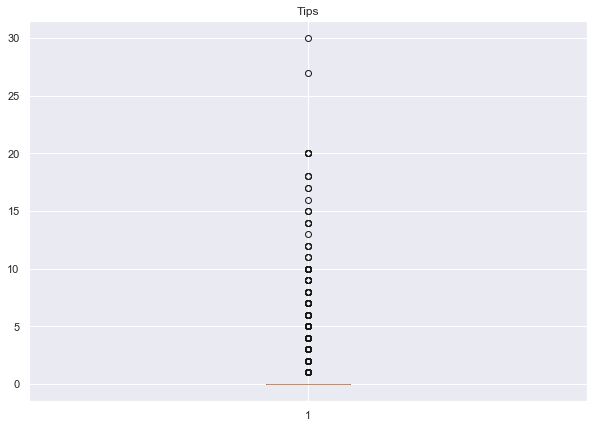

In [194]:
plt.figure(figsize=(10,7))
plt.boxplot(df['Tip'])
plt.title('Tips')
plt.show()

#### Scatter Plots

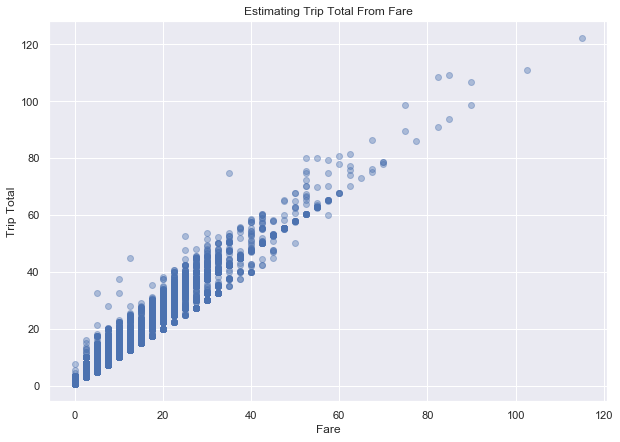

In [195]:
plt.figure(figsize=(10,7))
plt.scatter(df['Fare'], df['Trip Total'], alpha = 0.4)
plt.xlabel('Fare')
plt.ylabel('Trip Total')
plt.title('Estimating Trip Total From Fare')
plt.show()

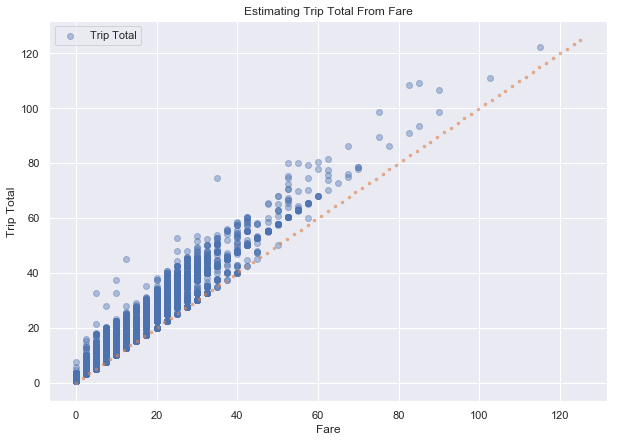

In [196]:
plt.figure(figsize=(10,7))
plt.scatter(df['Fare'], df['Trip Total'], alpha = 0.4)
x = np.linspace(0,125,75)
y = x
plt.xlabel('Fare')
plt.ylabel('Trip Total')
plt.title('Estimating Trip Total From Fare')
plt.scatter(x, y, alpha=0.6, marker=".", linewidths=0.5)
plt.legend(loc='upper left')
plt.show()

Hypothesis: Riders who take longer trips are more likely to tip.

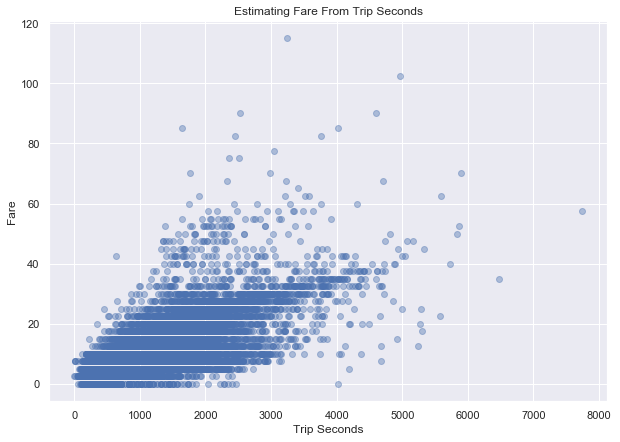

In [197]:
plt.figure(figsize=(10,7))
plt.scatter(df['Trip Seconds'], df['Fare'], alpha = 0.4)
plt.ylabel('Fare')
plt.xlabel('Trip Seconds')
plt.title('Estimating Fare From Trip Seconds')
plt.show()

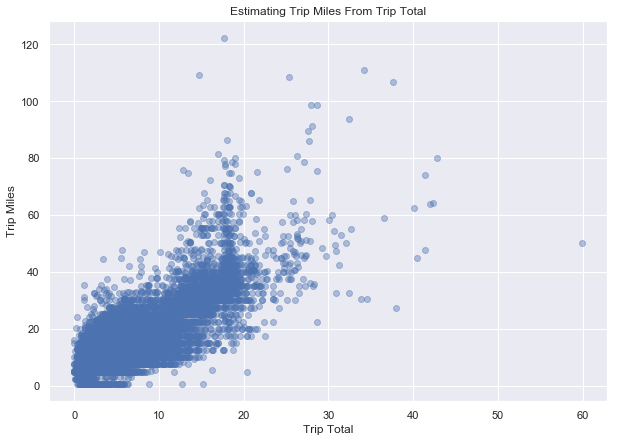

In [198]:
plt.figure(figsize=(10,7))
plt.scatter(df['Trip Miles'], df['Trip Total'], alpha = 0.4)
plt.ylabel('Trip Miles')
plt.xlabel('Trip Total')
plt.title('Estimating Trip Miles From Trip Total')
plt.show()